In [1]:
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn import datasets

# Dataset

Usamos [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) para gerar 

In [2]:
N = 1  # numero de features que queremos. vamos usar 1 para poder visualizar o resultado
M = 1000  # numero de exemplos (data points)

In [3]:
x_values, y_values = datasets.make_regression(
    n_samples=M, 
    n_features=N, 
    random_state=1,  # queremos que este comando sempre gere os mesmos dados
    coef=False,  # não queremos que os coeficientes do modelo linear subjacente sejam retornados
    noise=2,
)

# precisamos adicionar uma coluna em X com todos os valores iguais a "1" para ter um termo constante na regressão
train_X = np.concatenate([np.ones([x_values.shape[0], 1]), x_values], axis=1)
train_Y = y_values.reshape(-1, 1)
m, n = train_X.shape

In [4]:
print("Tamanho treinamento", m, "Features", n)

Tamanho treinamento 1000 Features 2


## Descrição sumária do método

A descida de gradiente (gradient descent) é baseada no fato que, se a função $\mathscr{F} (x)$ é definida e diferenciável na vizinhança de um ponto $x = x_0$, então o valor desta função diminui mais rápido se $x_0$ for na direção inversa do gradiente de $\mathscr{F}$, _i.e._,  $-\bigtriangledown \mathscr{F} (x)$ .

Desta forma podemos considerar que iniciando em um ponto $x_0$ (estimativa inicial do ponto de mínimo) podemos nos mover para o ponto correto segundo uma sequência:

$x_{n+1} = x_n - \gamma_n \bigtriangledown \mathscr{F}(x_n), n \ge 0$

se o tamanho do passo (learning rate) dado por $alpha$ for pequeno o suficiente, como ilustrado na figura abaixo:

<img src="Gradient_descent.png" style="height:300px;">

ref. https://en.wikipedia.org/wiki/Gradient_descent.

$X \in \mathbb{R}^{m \times (n + 1)}$, onde a primeira columa é composta pelo valor 1 e cada linha é um data point

<img src="matrix_X.svg">


$Y \in \mathbb{R}^{m}$

$J(\theta) = \frac{1}{2m} [X \theta^{T} - Y]^{T}[X \theta^{T} - Y]$

O objetivo é obter $\min J(\theta)$

In [5]:
def get_J(X, Y, theta):
    """
        calcula o custo J
    """
    m, n = X.shape
    yhat = X @ theta
    diff = yhat - Y  # erros
    #
    # custo é MSE: media do quadrado dos erros
    # 
    custo = np.mean(diff ** 2)
    return custo

$\bigtriangledown F = \frac{1}{m} X^{T}(X \theta^{T} - Y)^{T}$

$\theta_{t+1} = \theta_t - \alpha \bigtriangledown F$, onde $\alpha$ é o learning rate.

In [6]:
def calc_gradiente_J(X:np.array, Y:np.array, theta:np.array, alpha: float = 0.001):
    m, n = X.shape
    grad = X.T @ (X @ theta - Y) / m
    return grad

## simulação de gradient descent

In [7]:
num_max_iter = 400  # executar n vezes
alfa = 0.01

theta = np.random.random((n, 1))
print("Theta:", theta.shape)
print("alpha:", alfa)

log = []
with tqdm(range(num_max_iter)) as pbar:
    for i in pbar:
        # obtem o valor de theta
        gradiente = calc_gradiente_J(train_X, train_Y, theta, alfa)
        new_theta = theta - alfa * gradiente
        # calcula o custo
        J = get_J(train_X, train_Y, new_theta)
        log.append({"iteracao": i, "custo": J, "RMSE": np.sqrt(J)})
        # print("Iteração:", i, "J:", j)
        theta = new_theta                  
        pbar.set_description(f"Custo: {J}")       

print(f"Executadas {i + 1} iteracoes...")

Theta: (2, 1)
alpha: 0.01


Custo: 4.659429560736064: 100%|███████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1353.34it/s]

Executadas 400 iteracoes...


## plot erro durante gradient descent

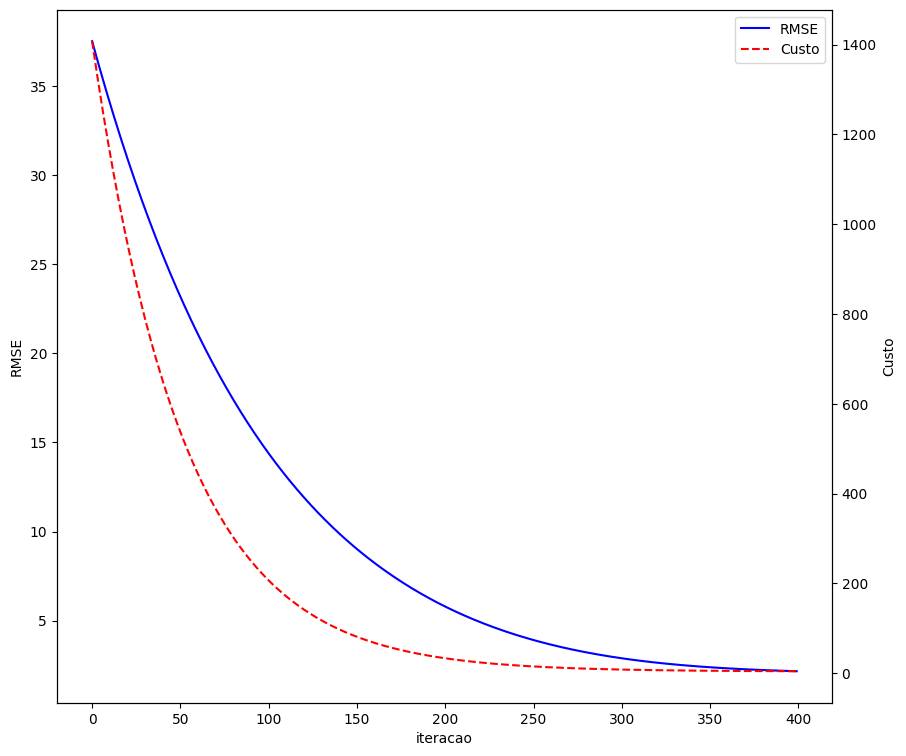

In [8]:
df = pd.DataFrame(log)

fig, ax = plt.subplots(figsize=(10, 9))

_ = df.plot.line(x="iteracao", y="RMSE", color="blue", ax=ax)
ax.get_legend().remove()
ax.set_ylabel("RMSE")

ax2 = ax.twinx()
_ =  df.plot.line(x="iteracao", y="custo", ax=ax2, color="red", linestyle="dashed")
_ = ax2.set_ylabel("Custo")

plt.legend([ax.get_lines()[0], ax2.get_lines()[0]], ["RMSE", "Custo"])
plt.show()

In [9]:
# Plota a reta de regressão

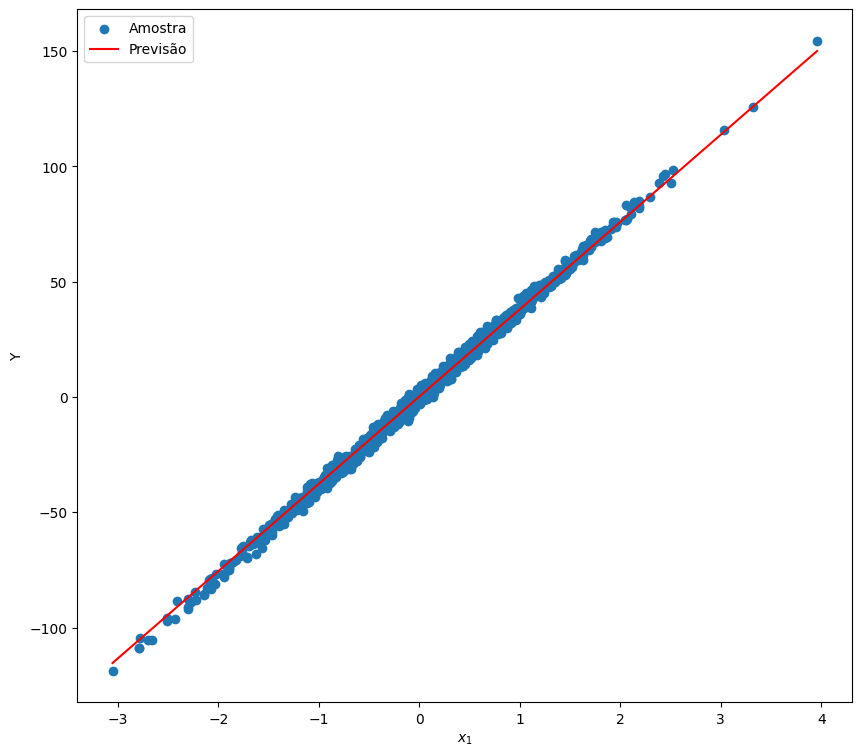

In [10]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.scatter(train_X[:, 1], train_Y, label="Amostra")

x_min, x_max = np.min(train_X[:, 1]), np.max(train_X[:, 1])
y_min, y_max = theta[0] + theta[1] * x_min, theta[0] + theta[1] * x_max

ax.plot([x_min, x_max], [y_min, y_max], label="Previsão", color="red")
ax.set_xlabel("$x_1$")
ax.set_ylabel("Y")

plt.legend()
plt.show()